### Exploring Data in Python Part 1

#### Exploring your working directory

In [ ]:
# Open a file: file
file = open('moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed())

In [ ]:
# Read and print the first 3 lines
with open('moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

### Flat Files
* Flat files are basic text files containing records, that is, table data, without structured relationships. The file extenstion for flat files can be .csv for comma-separated values or .txt for text files, and values in flat files can be separated by delimeters other than commas.
* It is important to know whether a flat fike has a header, as it may affect data import. The text also discusses how to import flat files using numpy or pandas and provide examples of tab-delimited files containing numeric or string data.

### Importing flat files using NumPy
* This article discusses the use of NumPy,  aPython package, to import flat files as numpy arrays, which are efficient and essential for other packages like scikit-learn. It explains the use of NumPy functions like loadtxt and genfromtxt to import data, and also covers customizations that can be made, such as delimiters, skipping rows, and selecting columns.
* The article also mentions the difficulty of importing mixed datatypes and suggests using other functions to handle them.

In [ ]:
# Import package
import numpy as np

# Assign filename to variable: file
file = 'digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimeter = ',')

# Print datatype of digits
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular colunns?

# Import numpy as np
file = 'digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimeter='\t', skiprows=1, usecols=[0,2])

# print data
print(data)

##### Importing different datatypes

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# print the first element of data
print(data[0])

['Time' 'Percent']


In [19]:
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

In [20]:
print(data_float[9])

[0.    0.357]


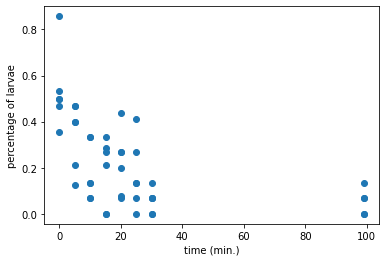

In [21]:
# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()

##### Working with mixed datatypes

In [23]:
# Assign a filename: file
file = 'titanic_sub.csv'

# import file using np.recfromcsv: d
d = np.recfromcsv(file)

# print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/Users/lannonkhau/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/npyio.py:2405: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas
* Discusses the need for a two-dimensional labeled data structure with columns of potentially different types that can be easily manipulated sliced, reshaped, grouped, joined, merged, and analyzed in missing-value-friendly manner, which is fulfilled by Pandas' DataFrame.
* It explains that Pandas is a library for Python that fills the gap between data preparation and data analysis and modeling, and that the most relevant data structure to the data manipulation and analysis workflow that Pandas offers is the DataFrame.
* This section also covers the DataFrame to a NumPy array.
* Finally, it explains that using Pandas to import flat files as DataFrames is standard and best practice in Data Science

In [26]:
import pandas as pd

# Assign the filename: file
file = 'titanic_sub.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


##### Using pandas to import flat files as DataFrames (2)

In [28]:
# Assign the filename: file
file = 'digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = data.values

# Print the datatype of data array to the shell
print(type(data_array))

FileNotFoundError: [Errno 2] No such file or directory: 'digits.csv'

##### Customizing your pandas import

In [ ]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

### Final Thoughts on Import
* Emphasized the importance of using pandas to import data, although it's useful to be aware of other methods as well. The next chapter will cover importing various file types using pandas, and the author mentions the constant development of new file formats and import methods. The sequel to this course will cover scrapuing data from the web and interacting with APIs.

### Not So Flat Anymore
##### Loading a pickled file
* There are number of dataypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

In [ ]:
# Import pickle package
import pickle

# Open pickle file and load data
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# print data
print(d)

# print datatype
print(type(d))

##### Listing sheets in Excel Files
* Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel.

In [1]:
# import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# print sheet name
print(xls.sheet_names)

['2002', '2004']


##### Importing sheets from Excel Files
* In the previous exercise, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In [2]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1)

# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

    War(country)      2004
0    Afghanistan  9.451028
1        Albania  0.130354
2        Algeria  3.407277
3        Andorra  0.000000
4         Angola  2.597931
..           ...       ...
187    Venezuela  0.000000
188      Vietnam  0.037507
189  Yemen, Rep.  3.602868
190       Zambia  0.041963
191     Zimbabwe  0.509568

[192 rows x 2 columns]
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


##### Customizing your spreadsheet import
* here you'll parse your spreadsheet and use additional arguments to skip rows, rename columns and select only particular columns

In [4]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country','AAM due to War (2022)'])

# Print the head of the dataframe df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2)

               Country  AAM due to War (2022)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
                 Country
0                Albania
1                Algeria
2                Andorra
3                 Angola
4    Antigua and Barbuda
..                   ...
186            Venezuela
187              Vietnam
188          Yemen, Rep.
189               Zambia
190             Zimbabwe

[191 rows x 1 columns]


### Importing SAS/Stata files using pandas
* The article concludes by emphasizing the importance of using pandas to import data, although its useful to be aware of other methods as well. The next chapter will cover importing various file types using pandas, and the author mentions the constant development of new file formats and import methods. The sequel to this course will cover scraping data from the web and interacting with APIs.

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


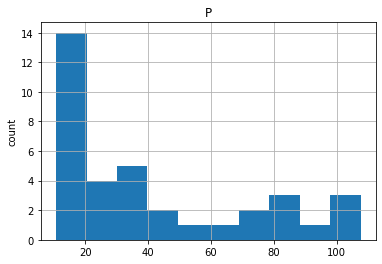

In [8]:
from sas7bdat import SAS7BDAT
import matplotlib.pyplot as plt

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head pf DataFrame
print(df_sas.head())

# Plot histograms of a DataFrame feature (Pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

### Using read_stata to import Stata files
* The pandas package has been imported in the environment as pd and the file disarea.dta is in your working directory. The consists of disease for several diseases in various countries.

##### Importing Stata Files
* Here, you'll gain expertise in importing Stata files as DataFrames using the pd.read_stata() functions from pandas.

In [9]:
# Import pandas
import pandas as pd

# Load Stata file into pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# print the head of the DataFrame: df
print(df.head())

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

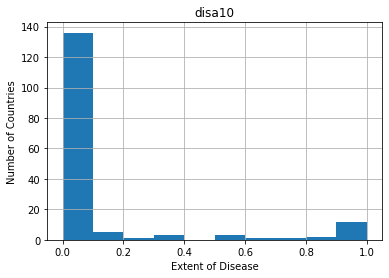

In [10]:
# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of Disease')
plt.ylabel('Number of Countries')
plt.show()

##### Using File to import HDF5 Files

In [13]:
# import packages
import numpy as np
import h5py

# Assign filename: file
file = 'LIGO_data.hdf5'
file = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load the data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


##### Extracting data from your HDF5 file

Strain


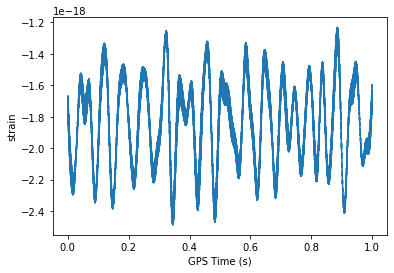

In [17]:
# Get the HDF5 group: group
group = data['strain']

# Check out the keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = np.array(data['strain']['Strain'])

# Set number of time points to sample:
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

### Importing MATLAB files
* The focus on importing MATLAB files (.mat) into Python. MATLAB is a numerical computing environment widely used in the fields of engineering and science, and its native file format is .mat. The scipy library provides the loadmat and savemat functions to read and write .mat files in Python
* A .mat file contains a collection of MATLAB objects, such as strings, floats, vectors, and arrays, stored in a MATLAB workspace. When a .mat file is imported into Python using loadmat, it results in a dictionary where the keys are the variable names in the MATLAB workspace, and the values are the corresponding objects assigned to those variables.

##### Loading .mat files

In [18]:
# import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat('ja_data2.mat')

# Print the datatupe of mat
print(type(mat))

<class 'dict'>


##### The structure of .mat in Python
* Here you'll discover what is the MATLAB dictionary that you loaded.

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


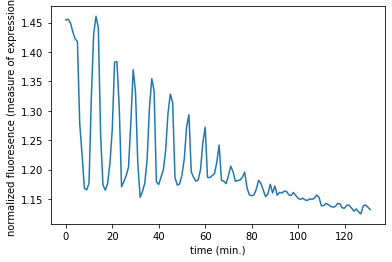

In [20]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the valye corresponding to the key "CYratioCyt"
print(type(mat['CYratioCyt']))

# Print the shape of the valye corresponding to the key 'CYratioCyt'
print(np.shape(mat['CYratioCyt']))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluoresence (measure of expression)')
plt.show()

